In [2]:
import numpy as np
import scipy.io
from numpy.random import multivariate_normal
from scipy.linalg import cho_factor, cho_solve

In [3]:
# Define vectores para los colores de la representación gráfica.
dark = np.array([51.0, 51.0, 51.0]) / 255.0
red = np.array([141.0, 45.0, 57.0]) / 255.0
gold = np.array([174.0, 159.0, 109.0]) / 255.0
gray = np.array([175.0, 179.0, 183.0]) / 255.0
lred = np.array([1, 1, 1]) - 0.5 * (np.array([1, 1, 1]) - red)
lgold = np.array([1, 1, 1]) - 0.5 * (np.array([1, 1, 1]) - gold)

Este código se usa tanto para la animación de la lineal bayesiana como para la de Wiener, aunque se puede
hacer a partir de cualquier vector de rasgos.

In [ ]:
def phi(a):  # phi(a) = [1,a]
    # La función range crea una secuencia hasta el número inferior al que le pasemos. 
    return np.power(a, range(2))

/var/folders/j6/qym0h_n532zfn98gr33fk54c0000gn/T/ipykernel_87476/1291579899.py:76: RuntimeWarning: invalid value encountered in sqrt
  stdpo = np.sqrt(np.diag(vpost))[:, np.newaxis]  # marginal stddev, for plotting
/var/folders/j6/qym0h_n532zfn98gr33fk54c0000gn/T/ipykernel_87476/1291579899.py:99: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)
/var/folders/j6/qym0h_n532zfn98gr33fk54c0000gn/T/ipykernel_87476/1291579899.py:99: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)
/var/folders/j6/qym0h_n532zfn98gr33fk54c0000gn/T/ipykernel_87476/1291579899.py:99: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)
/var/folders/j6/qym0h_n532zfn98gr33fk54c0000gn/T/ipykernel_87476/1291579899.py:99: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)


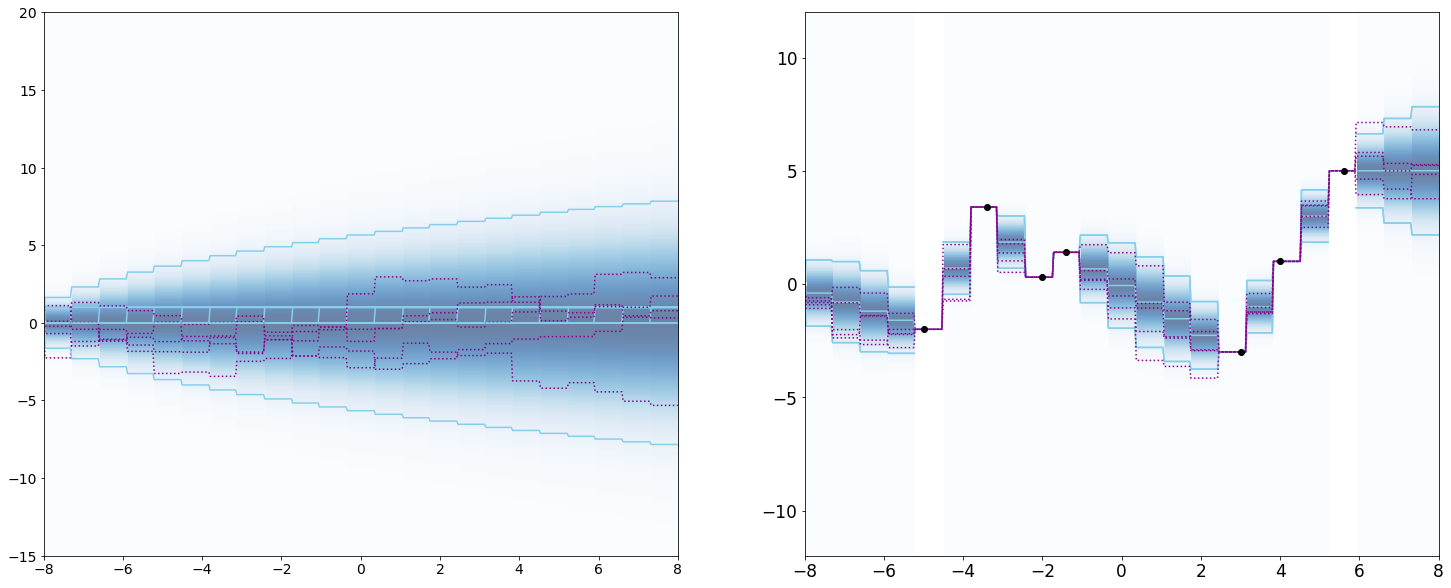

In [8]:
# Código de la animación.
# Vector de parámetros para la animación.
#r=list(np.arange(2,120))
r=[4]
# first, define the prior
for i in r:
    
    def phi(a):
    # Función salto definida a trozos. En cada trozo te dice si a es mayor que el valor 
    # en ese intervalo o no. Se vale de que True=1, False=0.
        return  (a > np.linspace(-8, 8, 6*i).T)  # steps that switch on

    F = len(phi(0))  # number of features. Evaluado en 0 por poner algo que no sea dependiente.
    # set parameters of prior on the weights
    mu = np.zeros((F, 1)) # F denota el número de filas, 1 de columnas
    Sigma = (16/(6*i)) * np.eye(F)  # p(w)=N(mu,Sigma)
    # construct implied prior on f_x
    n = 500  # number of grid-points, for plotting
    x = np.linspace(-8, 8, n)[:, np.newaxis]  # reshape is needed for phi to work
    m = phi(x) @ mu # Media para p(f)
    kxx = phi(x) @ Sigma @ phi(x).T  # p(f_x)=N(m,kxx) 
    s = multivariate_normal(m.flatten(), kxx + 1e-6 * np.eye(n), size=5).T #samples
    stdpi = np.sqrt(np.diag(kxx))[:, np.newaxis]  # marginal stddev, for plotting



#X = np.array([-5]).reshape(1,1)
#Y = np.array([-5]).reshape(1,1)
#X = np.array([-5,-3.4]).reshape(2,1)
#Y = np.array([-5,1]).reshape(2,1)
#X = np.array([-5,-3.4,-2]).reshape(3,1)
#Y = np.array([-5,1,-1]).reshape(3,1)
#X = np.array([-5,-3.4,-2,-1.4]).reshape(4,1)
#Y = np.array([-5,1,-1,0]).reshape(4,1)
#X = np.array([-5,-3.4,-2,-1.4,3]).reshape(5,1)
#Y = np.array([-5,1,-1,0,1.5]).reshape(5,1)
#X = np.array([-5,-3.4,-2,-1.4,3,4]).reshape(6,1)
#Y = np.array([-5,1,-1,0,1.5,5]).reshape(6,1)
#X = np.array([-5,-3.4,-2,-1.4,3,4,5.6]).reshape(7,1)
#Y = np.array([-5,1,-1,0,1.5,5,3]).reshape(7,1)

    X = np.array([-5,-3.4,-2,-1.4,3,4,5.6]).reshape(7,1)
    Y = np.array([-2,3.4,0.3,1.4,-3,1,5]).reshape(7,1)


    sigma=0
    N = len(X)  
    M = phi(X) @ mu
    kXX = phi(X) @ Sigma @ phi(X).T  # p(f_X) = N(M,k_XX)
    G = kXX + sigma ** 2 * np.eye(N)

    G = cho_factor(G)
    kxX = phi(x) @ Sigma @ phi(X).T  
    A = cho_solve(G, kxX.T).T  

    Sigma_phi = Sigma @ phi(X).T
    B = cho_solve(G, Sigma_phi.T).T

    mwpost = mu + B @ (Y - M)
    vwpost = Sigma - B @ Sigma_phi.T

    mpost = m + A @ (Y - M)  
    vpost = kxx - A @ kxX.T 
    spost = multivariate_normal(mpost.flatten(), vpost  + 1e-6 * np.eye(n), size=5).T  
    stdpo = np.sqrt(np.diag(vpost))[:, np.newaxis] 
    
    
    import matplotlib.pyplot as plt
    from matplotlib import rc

    plt.rcParams["figure.figsize"] = (25, 10)

    rc('text', usetex=False)
    rc('font', size=14)
    rc('legend', fontsize=13)
    rc('text.latex', preamble=r'\usepackage{cmbright}')
    rc('text.latex', preamble=r'\usepackage[sc]{mathpazo}')


    fig, ax = plt.subplots(1, 2)

    rc('font', size=14)
    rc('legend', fontsize=13)



    def GaussPDFscaled(y, m, s):  
        return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)


    yy = np.linspace(-15, 20, 400).reshape([400, 1])
    P = GaussPDFscaled(yy, m, stdpi)

 
    ax[0].imshow(
        P, extent=[-8, 8, -15, 20], aspect="auto", origin="lower", cmap="Blues", alpha=0.6
    )
    ax[0].plot(x, phi(x), "-", color='skyblue')
    ax[0].plot(x, s, ":", color='darkmagenta')  
    ax[0].plot(x, m, "-", color='skyblue')
    ax[0].plot(x, m + 2 * stdpi, "-", color='skyblue')
    ax[0].plot(x, m - 2 * stdpi, "-", color='skyblue')
    ax[0].set(xlim=[-8, 8], ylim=[-15, 20], title="")


    Ppost = GaussPDFscaled(yy, mpost, stdpo) 
    ax[1].imshow(
        Ppost,
        extent=[-8, 8, -15, 20],
        aspect="auto",
        origin="lower",
        cmap="Blues",
        alpha=0.6,
    )
    ax[1].errorbar(X, Y, yerr=0, fmt='ok')
               #, capsize=4, capthick=1, markersize=4)  
    ax[1].plot(x, mpost, "-", color='skyblue')  
    ax[1].plot(x, mpost + 2 * stdpo, "-", color='skyblue')  
    ax[1].plot(x, mpost - 2 * stdpo, "-", color='skyblue')  

    ax[1].plot(
        x, mpost + 2 * stdpo + 2 * sigma, "-", color='skyblue'
    )  
    ax[1].plot(x, mpost - 2 * stdpo - 2 * sigma, "-", color='skyblue')

    ax[1].plot(x, spost, ":", color='darkmagenta')  
    ax[1].set(xlim=[-8, 8], ylim=[-12, 12], title="")
    ax[1].tick_params(axis='both', which='major', labelsize=17)
    ax[1].tick_params(axis='both', which='minor', labelsize=15)
    plt.show()

    fig.savefig('simul_'+ str(6*i) + '.png',dpi=200)

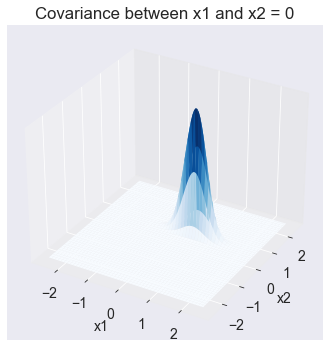

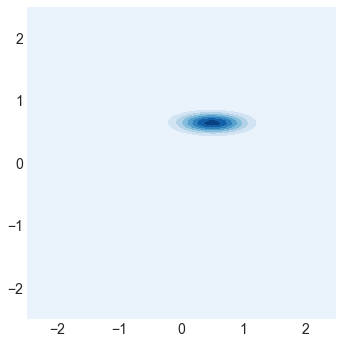

[0.49792084 0.64579158]


In [273]:
#Plot de la matriz de covarianzas de las distribuciones de parámetros a priori y a posteriori.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,5
fig = plt.figure()
 
random_seed=1000
cov_val = [0]
 

#mean = mu.reshape(2,)
mean = mwpost.reshape(2,) 
pdf_list = []
 
for idx, val in enumerate(cov_val):
     
    #cov = Sigma
    cov = vwpost
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-2.5, 2.5, num=100)
    y = np.linspace(-2.5, 2.5, num=100)
    X, Y = np.meshgrid(x,y)
     
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = "Blues")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covarianza entre x1 y x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
fig=plt.figure()

for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap="Blues")
    #plt.xlabel("x1")
    #plt.ylabel("x2")
    #plt.title(f'')
plt.tight_layout()
plt.show()
fig.savefig("dist7", dpi=200)